# Test results

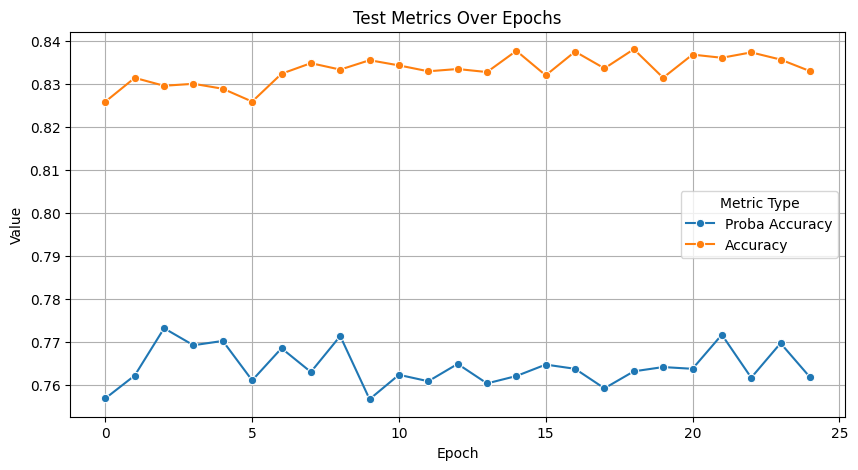

Max value for Proba Accuracy: 0.773 at epoch 3
Max value for Accuracy: 0.838 at epoch 19


In [12]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Initialize the W&B API
api = wandb.Api()

# Fetch the specific run
run = api.run("yogev-avishag/NLP2024_PROJECT_yogev-namir/w1mh22qa")

# Get the summary metrics
metrics = run.summary

# Filter and organize metrics that contain "ENV_Test_accuracy_per_mean_user_and_bot_epoch" and "ENV_Test_proba_accuracy_per_mean_user_and_bot_epoch"
pattern_accuracy = re.compile(r"ENV_Test_accuracy_per_mean_user_and_bot_epoch(\d+)")
pattern_proba = re.compile(r"ENV_Test_proba_accuracy_per_mean_user_and_bot_epoch(\d+)")
data = []

for key, value in metrics.items():
    match_accuracy = pattern_accuracy.match(key)
    match_proba = pattern_proba.match(key)
    if match_accuracy:
        epoch = int(match_accuracy.group(1))
        data.append((epoch, 'Accuracy', value))
    elif match_proba:
        epoch = int(match_proba.group(1))
        data.append((epoch, 'Proba Accuracy', value))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["epoch", "type", "value"])

# Plot the data using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="epoch", y="value", hue="type", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Test Metrics Over Epochs")
plt.grid(True)
plt.legend(title="Metric Type")
plt.show()

# Find and print the max value for each type
for metric_type in df['type'].unique():
    filtered_df = df[df['type'] == metric_type]
    max_row = filtered_df.loc[filtered_df['value'].idxmax()]
    print(f"Max value for {metric_type}: {max_row['value']:.03} at epoch {max_row['epoch']+1}")


# Train results

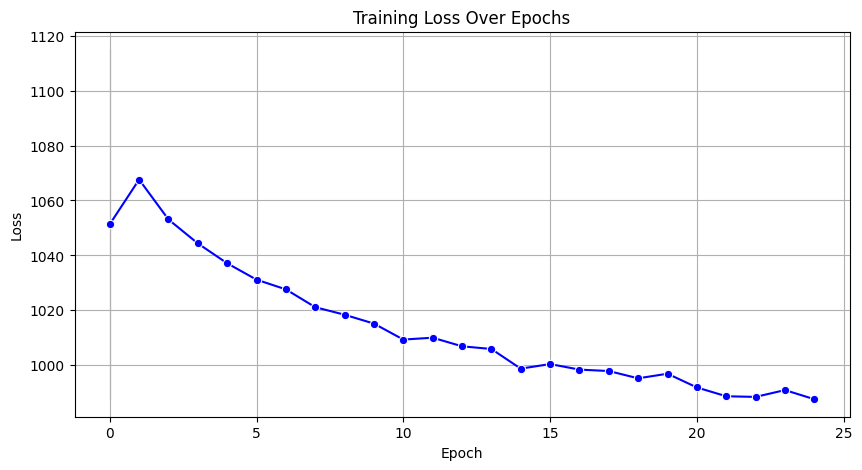

Min value for TotalLoss: 987.62 at epoch 25


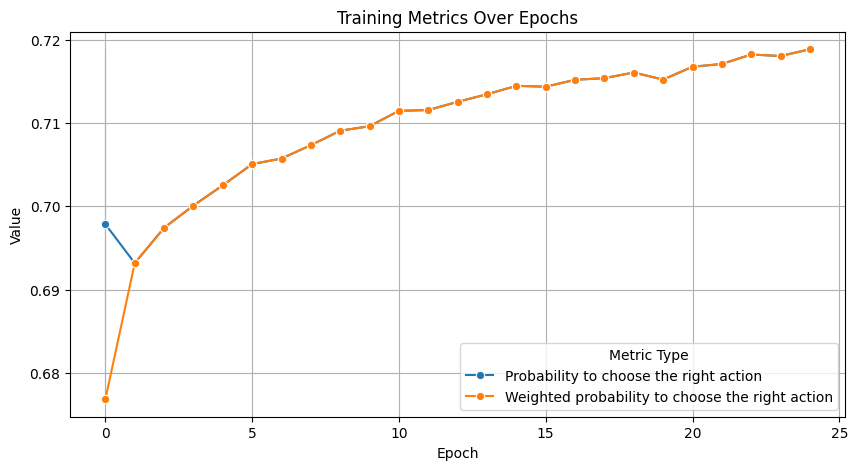

Max value for Probability to choose the right action: 0.719 at epoch 25
Max value for Weighted probability to choose the right action: 0.719 at epoch 25


In [2]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Initialize the W&B API
api = wandb.Api()

# Fetch the specific run
run = api.run("yogev-avishag/NLP2024_PROJECT_yogev-namir/w1mh22qa")

# Get the summary metrics
metrics = run.summary

# Define patterns for the different metrics
patterns = {
    'TotalLoss': re.compile(r"ENV_Train_TotalLoss(?:_epoch(\d+))?"),
    'Probability to choose the right action': re.compile(r"ENV_Train_Probability to choose the right action(?:_epoch(\d+))?"),
    'Weighted probability to choose the right action': re.compile(r"ENV_Train_Weighted probability to choose the right action:_epoch(\d+)")
}

# Collect data for each pattern
data = []

for key, value in metrics.items():
    for metric_type, pattern in patterns.items():
        match = pattern.match(key)
        if match:
            epoch = int(match.group(1)) if match.group(1) is not None else 0
            data.append((epoch, metric_type, value))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["epoch", "type", "value"])

# Plot the loss data separately
loss_df = df[df['type'] == 'TotalLoss']

plt.figure(figsize=(10, 5))
sns.lineplot(data=loss_df, x="epoch", y="value", marker='o', color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

# Print the min value for the loss
min_loss_row = loss_df.loc[loss_df['value'].idxmin()]
print(f"Min value for TotalLoss: {min_loss_row['value']:.05} at epoch {min_loss_row['epoch']+1}")

# Plot the other metrics using seaborn
non_loss_df = df[df['type'] != 'TotalLoss']

plt.figure(figsize=(10, 5))
sns.lineplot(data=non_loss_df, x="epoch", y="value", hue="type", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Metrics Over Epochs")
plt.grid(True)
plt.legend(title="Metric Type")
plt.show()

# Find and print the max value for each type
for metric_type in non_loss_df['type'].unique():
    filtered_df = df[df['type'] == metric_type]
    max_row = filtered_df.loc[filtered_df['value'].idxmax()]
    print(f"Max value for {metric_type}: {max_row['value']:.03} at epoch {max_row['epoch']+1}")
